In [55]:
from common_imports import *
from api_init import initialize_apis
from data_extraction import get_continuous_risk_free_rate, get_live_ric_data
from testing import split_train_test_calendar_window, compare_simulated_to_real_returns, run_rolling_volatility_regime_model
from plotting import *
from branding import *
from models.gbm import monte_carlo_paths_gbm
from models.jump import monte_carlo_paths_jumps, calibrate_jump_model
from models.regime import monte_carlo_paths_regimes, calibrate_volatility_regime_model
from models.heston import monte_carlo_paths_heston, calibrate_heston_model

In [57]:
# Load the Excel file
df = pd.read_excel("data/historic_autocall_distributions.xlsx")

# Quick preview
print(df.head()).

  Ticker        Outcome  Percentage
0   MSFT  Autocalled Q1       65.89
1   MSFT  Autocalled Q2       13.51
2   MSFT  Autocalled Q3        5.30
3   MSFT  Autocalled Q4        3.04
4   MSFT    Breached KI        5.00


In [76]:
sp500_row = df.loc['SP500']
print(sp500_row)

Outcome
Autocalled Q1        69.45
Autocalled Q2        12.34
Autocalled Q3         4.22
Autocalled Q4         2.32
Breached KI           4.88
Survived Above KI     6.79
Name: SP500, dtype: float64


In [79]:
df

,Ticker,Outcome,Percentage
0,MSFT,Autocalled Q1,65.89
1,MSFT,Autocalled Q2,13.51
2,MSFT,Autocalled Q3,5.30
3,MSFT,Autocalled Q4,3.04
4,MSFT,Breached KI,5.00
...,...,...,...
596,SP500,Autocalled Q2,12.34
597,SP500,Autocalled Q3,4.22
598,SP500,Autocalled Q4,2.32
599,SP500,Breached KI,4.88


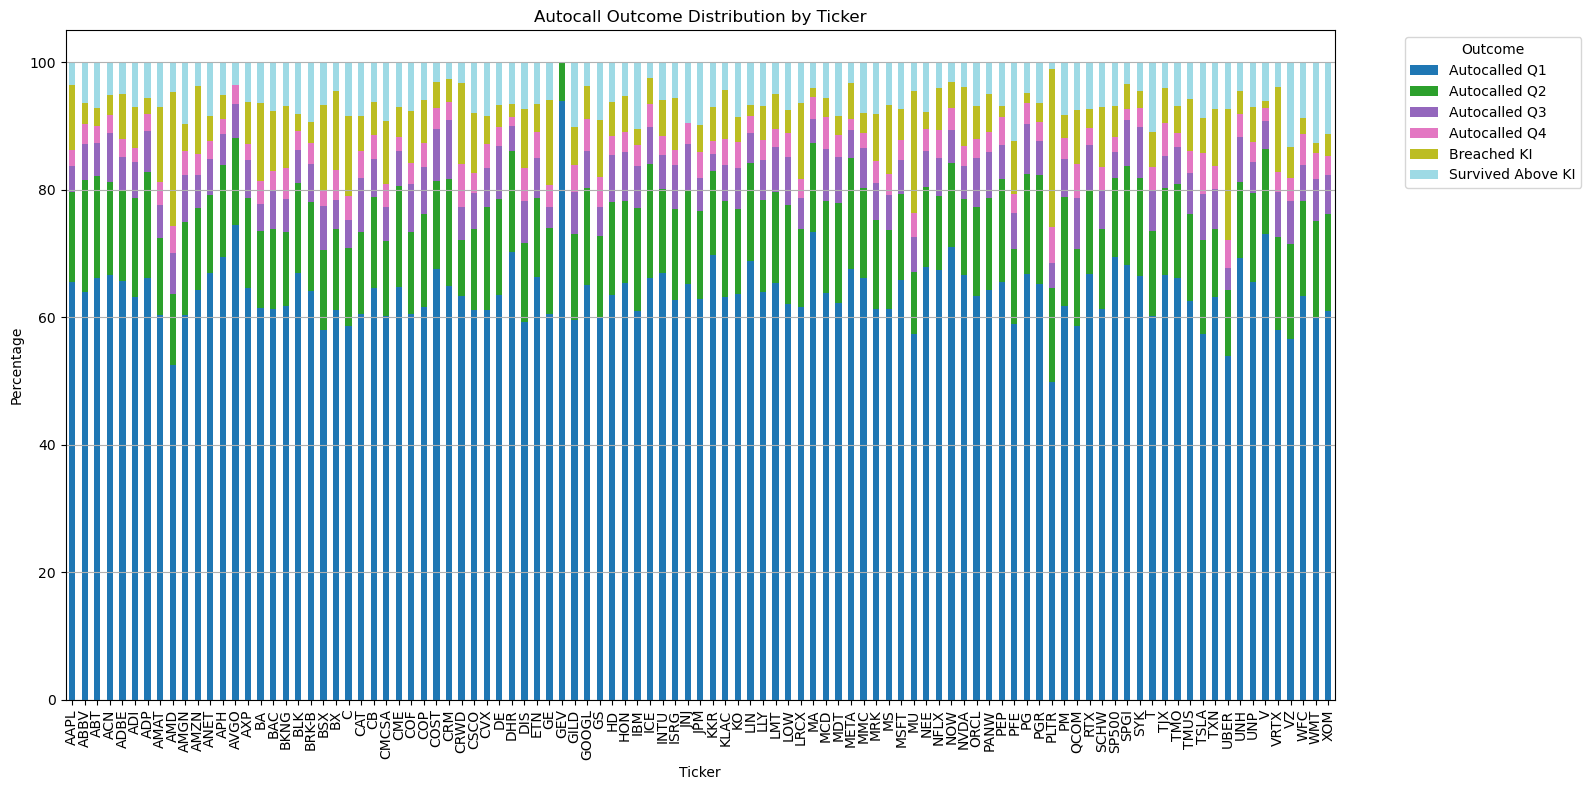

In [59]:
# Plot
df.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')
plt.title("Autocall Outcome Distribution by Ticker")
plt.ylabel("Percentage")
plt.xlabel("Ticker")
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [ ]:
# Heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(df, cmap="coolwarm", cbar_kws={'label': 'Percentage'})
plt.title("Autocall Outcome Heatmap per Ticker")
plt.ylabel("Ticker")
plt.xlabel("Outcome")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [84]:
import sys
sys.path.append('general')

# Import functions (adjust the path if you're not in the root)
from historic_autocall_probabilities import plot_autocall_stacked_bar, plot_autocall_heatmap

FileNotFoundError: [Errno 2] No such file or directory: '../data/actinver_team/muestra.xlsx'

In [85]:
def plot_autocall_heatmap(pivot_df, title="Autocall Outcome Heatmap per Ticker"):
    """
    Plots a heatmap of autocall outcome distributions.
    
    Parameters:
    - pivot_df: DataFrame with tickers as index and outcome percentages as columns.
    - title: Title of the heatmap.
    """
    plt.figure(figsize=(18, 6))
    sns.heatmap(pivot_df, cmap="coolwarm", cbar_kws={'label': 'Percentage'})
    plt.title(title)
    plt.ylabel("Ticker")
    plt.xlabel("Outcome")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

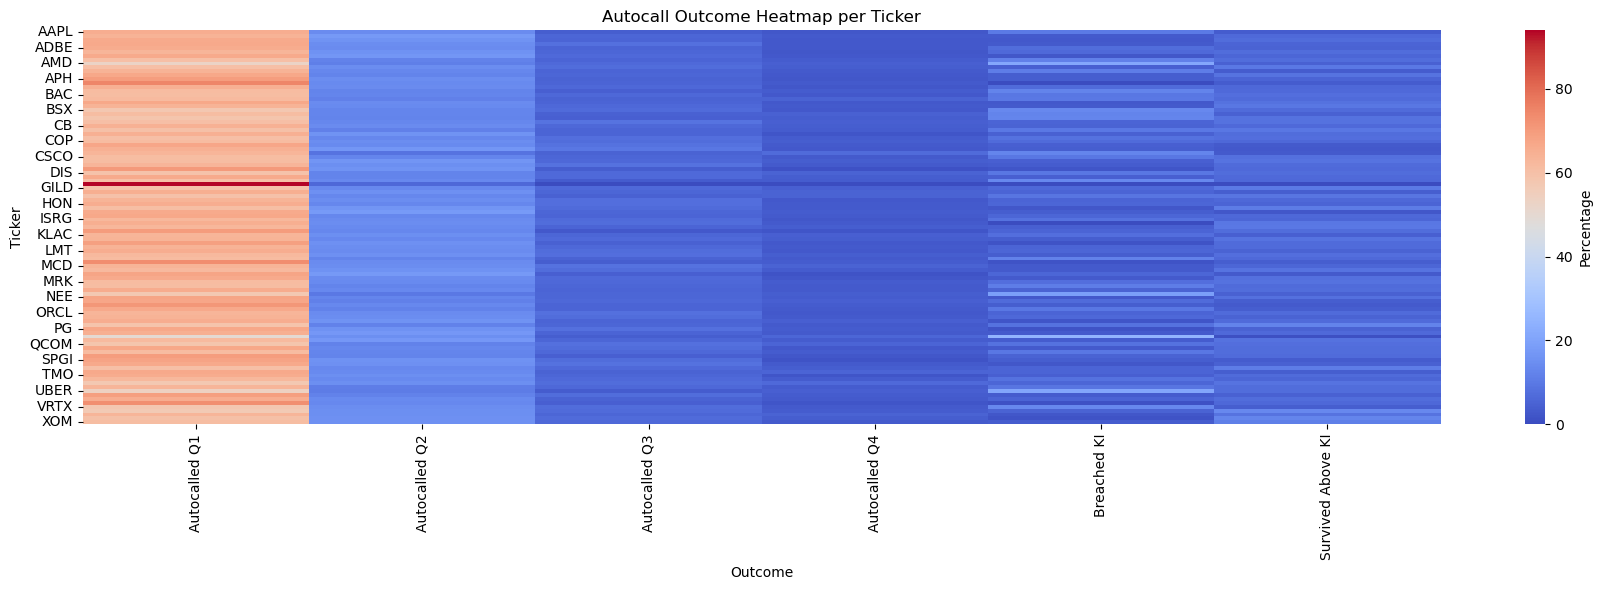

In [86]:
plot_autocall_heatmap(pivot_df)

In [82]:
# Now import from general
from general.historic_autocall_probabilities import plot_autocall_stacked_bar

FileNotFoundError: [Errno 2] No such file or directory: '../data/actinver_team/muestra.xlsx'